In [6]:
import osmnx as ox
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties, fontManager

# List of places (cities) you want to visualize
places = [
    "Mexico City, Mexico",
    "Puebla, Mexico",
    "Oaxaca, Mexico",
    "Palenque, Mexico",
    "Campeche, Mexico",
    "Playa del Carmen, Mexico"
]

# Define Mexican-themed color palette pairs
color_palette_actual = [
    ('#FF5733', '#900C3F'),  # Vibrant Orange and Dark Red
    ('#C70039', '#FFC300'),  # Deep Red and Bright Yellow
    ('#DAF7A6', '#581845'),  # Light Green and Deep Purple
    ('#FFBD69', '#2E1A47'),  # Warm Yellow and Dark Purple
    ('#FF33F0', '#33FFF6'),  # Bright Pink and Aqua Blue
    ('#33FF57', '#A020F0')   # Bright Green and Purple
]

# Extend with additional colors if necessary
additional_colors = [
    ('#FF6347', '#800000'),  # Tomato Red and Maroon
    ('#FFD700', '#4B0082'),  # Gold and Indigo
    ('#00FA9A', '#8B008B'),  # Medium Spring Green and Dark Magenta
    ('#00CED1', '#DC143C'),  # Dark Turquoise and Crimson
    ('#8B0000', '#FF4500'),  # Dark Red and Orange Red
    ('#FF1493', '#1E90FF'),  # Deep Pink and Dodger Blue
    ('#32CD32', '#FFD700'),  # Lime Green and Gold
    ('#FF8C00', '#483D8B'),  # Dark Orange and Dark Slate Blue
    ('#FF4500', '#2F4F4F')   # Orange Red and Dark Slate Gray
]

Available fonts:  ['.Aqua Kana', '.Keyboard', '.New York', '.New York', '.SF Arabic', '.SF Arabic Rounded', '.SF Armenian', '.SF Armenian Rounded', '.SF Camera', '.SF Compact', '.SF Compact', '.SF Compact Rounded', '.SF Georgian', '.SF Georgian Rounded', '.SF Hebrew', '.SF Hebrew Rounded', '.SF NS Mono', '.SF NS Mono', '.SF NS Rounded', '.SF Soft Numeric', '.ThonburiUI', 'Abolition', 'Academy Engraved LET', 'Al Bayan', 'Al Nile', 'Al Tarikh', 'Alegreya', 'Alegreya', 'Alegreya', 'American Typewriter', 'Andale Mono', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Chancery', 'Apple SD Gothic Neo', 'Apple Symbols', 'AppleGothic', 'AppleMyungjo', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial Black', 'Arial Hebrew', 'Arial Narrow', 'Arial Narrow', 'Arial Narrow', 'Arial Narrow', 'Arial Rounded MT Bold', 'Arial Unicode MS', 'Arial Unicode MS', 'Athelas', 'Avenir', 'Avenir Next', 'Avenir Next Condensed', 'Ayuthaya', 'Baghdad', 'Bangla MN', 'Bangla Sang

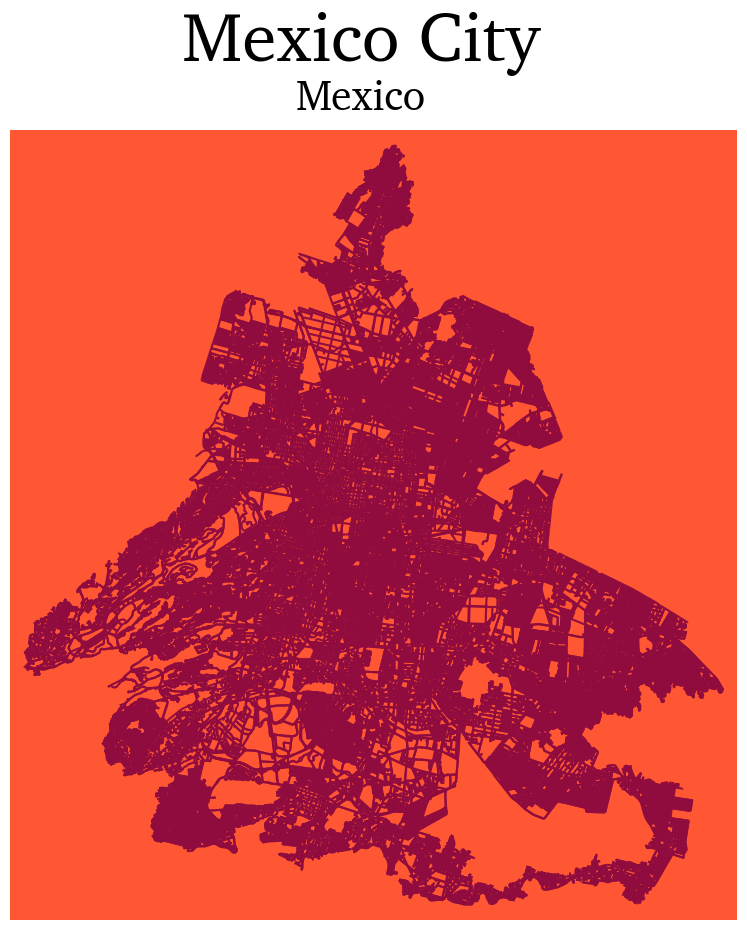

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/osmnx/_overpass.py:254: UserWarning: This area is 21 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


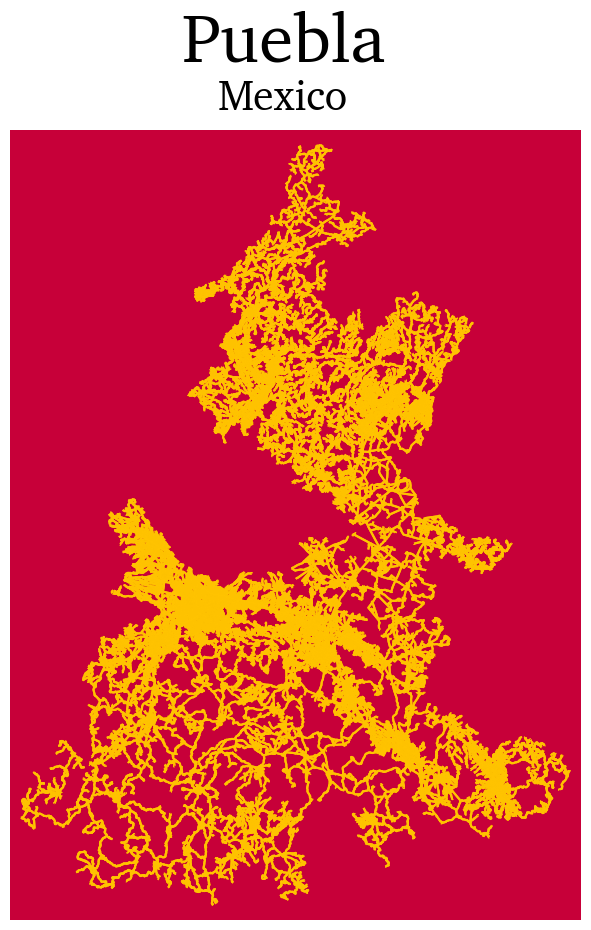

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/osmnx/_overpass.py:254: UserWarning: This area is 48 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


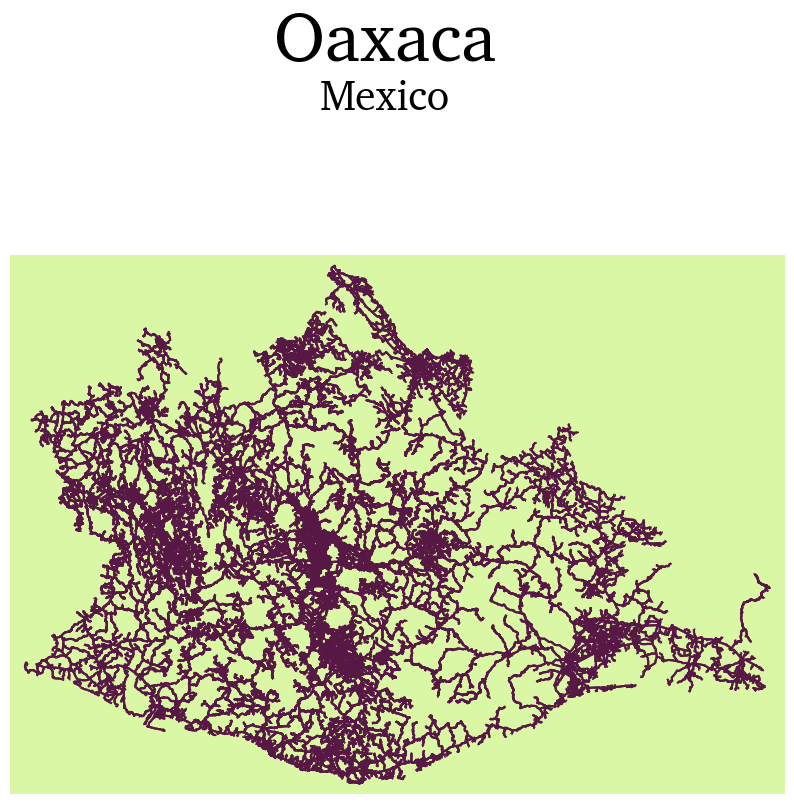

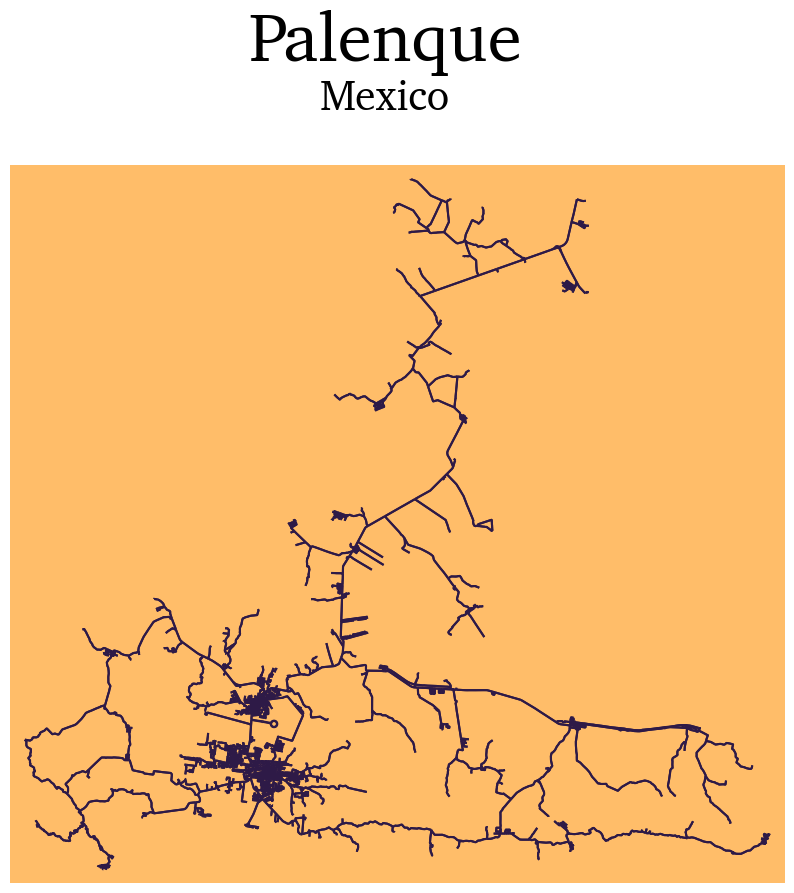

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/osmnx/_overpass.py:254: UserWarning: This area is 36 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


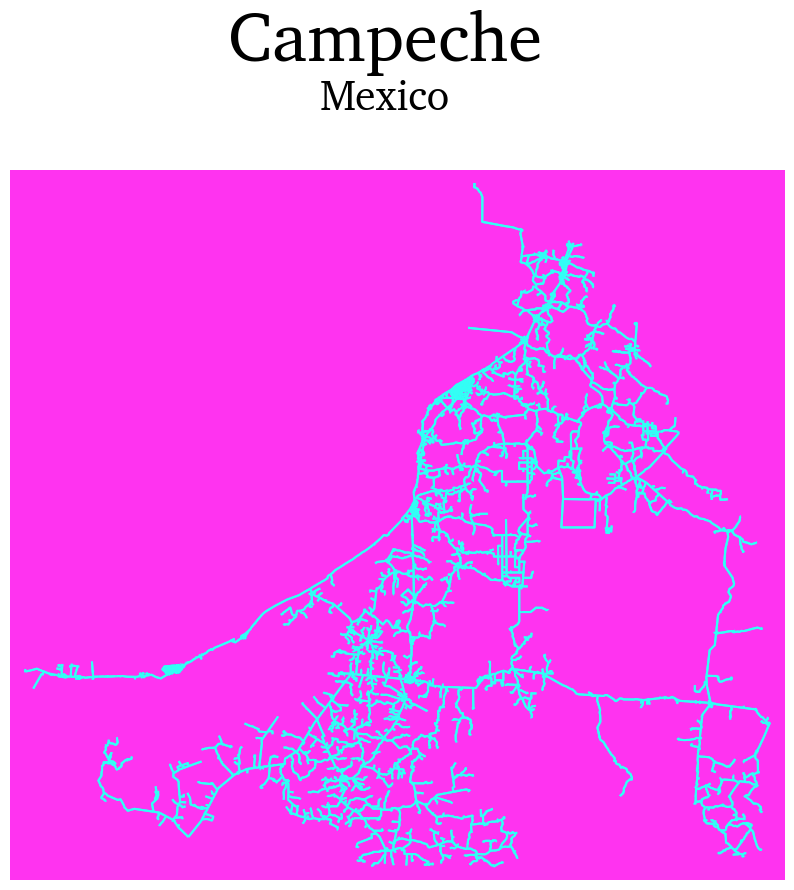

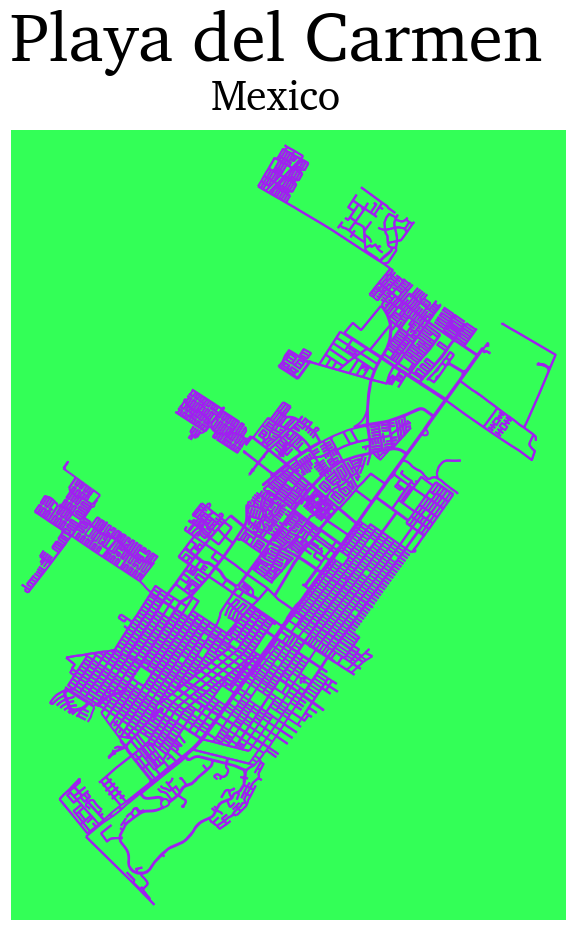

In [8]:
# Combine the colors to make 12 pairs
color_palette_actual.extend(additional_colors[:len(places) - len(color_palette_actual)])

# Check available fonts
available_fonts = sorted([f.name for f in fontManager.ttflist])
print("Available fonts: ", available_fonts)

# Set the font properties
font_properties_city = FontProperties(family='Charter', size=50)  # Font for city name
font_properties_country = FontProperties(family='Charter', size=30)  # Font for country name

for i, place_name in enumerate(places):
    # Split the place name into city and country
    try:
        city, state, country = place_name.split(', ')
    except ValueError:
        city, country = place_name.split(', ')
        state = ""
    
    title_text = f"{city}\n{country}"

    # Download the street network data
    graph = ox.graph_from_place(place_name, network_type='drive')

    # Select a color pair (cycling through the list)
    background_color, edge_color = color_palette_actual[i % len(color_palette_actual)]

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.subplots_adjust(top=0.90)  # Adjust to create space at the top

    # Set background color
    ax.set_facecolor(background_color)

    # Plot the street network on the axis
    ox.plot_graph(graph, ax=ax, node_size=0, edge_color=edge_color, edge_linewidth=1.5, show=False, close=False)

    # Add the city and country name above the visualization
    fig.suptitle(city, fontsize=50, fontproperties=font_properties_city, ha='center', y=1.02, color='black')
    fig.text(0.5, 0.92, country, fontsize=30, fontproperties=font_properties_country, color='black', ha='center')

    # Save the plot to a file
    filename = f'urban_area_{place_name.replace(", ", "_").replace(" ", "_")}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()